<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/%D0%B3%D0%B5%D0%BE%D1%80%D0%B3%D0%B8%D0%B9_4_clf_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

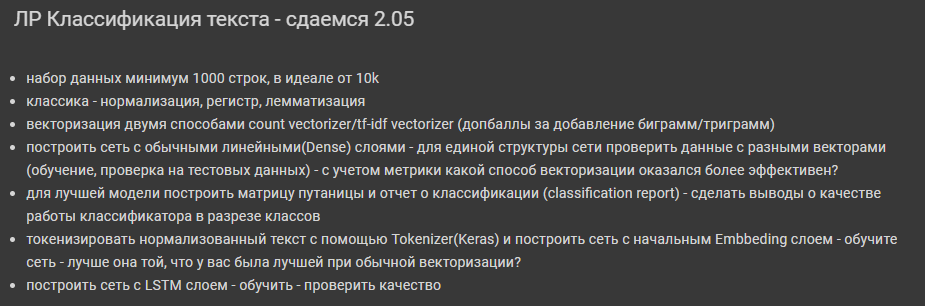

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install pymorphy2
import pymorphy2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 812.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ac98dad10d0aa726e40442b70a9bd79b591add13305d0370dc8f8c034db2e7ad
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_excel('/content/text.xlsx')
df.head()

,id,text,category,id_category
0,0,Друзья познаются в беде.,Пословица,10
1,1,"Не имей сто рублей, а имей сто друзей.",Пословица,10
2,2,"Скажи мне кто твой друг, и я скажу, кто ты.",Пословица,10
3,3,"С кем поведешься, от того и наберешься.",Пословица,10
4,4,Одинокое дерево ветер легче валит.,Пословица,10


In [7]:
text=df['text'] #берем столбец с текстом
norm_text=[]
# 1 - только буквы
# 2 - перевод в нижний регистр
# 3 - привести все слова в единую форму
morph=pymorphy2.MorphAnalyzer()
for s in tqdm(text):
    s1 = re.sub(r'[^\w\s]+|[\d]+', r'',s).strip()
    s1 = s1.lower()
    s1 = word_tokenize(s1) #токенизация
    words=[]
    for i in s1:
        pv = morph.parse(i)
        words.append(pv[0].normal_form)
    sentence=' '.join(words)
    norm_text.append(sentence)

100%|██████████| 1143/1143 [00:01<00:00, 581.04it/s]


In [8]:
norm_text[1]#результат

'не иметь сто рубль а иметь сто друг'

In [10]:
df['norm_text']=norm_text

In [11]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,id,text,category,id_category,norm_text
0,0,Друзья познаются в беде.,Пословица,10,друг познаваться в беда
1,1,"Не имей сто рублей, а имей сто друзей.",Пословица,10,не иметь сто рубль а иметь сто друг
2,2,"Скажи мне кто твой друг, и я скажу, кто ты.",Пословица,10,сказать я кто твой друг и я сказать кто ты
3,3,"С кем поведешься, от того и наберешься.",Пословица,10,с кто повестись от тот и набраться
4,4,Одинокое дерево ветер легче валит.,Пословица,10,одинокий дерево ветер лёгкий валита


In [12]:
#один способ векторизации
russian_stopwords = stopwords.words("russian")
vectorizer = CountVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords)
text_cv = vectorizer.fit_transform(df['norm_text'])
text_cv = pd.DataFrame(text_cv.toarray(),columns=vectorizer.get_feature_names_out())
text_cv.head()

,весь,вода,всё,дело,друг,зима,знать,свой,слово,хороший,человек,язык
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
#второй
vectorizer_tfidf = TfidfVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords)
text_tfidf = vectorizer_tfidf.fit_transform(df['norm_text'])
text_tfidf = pd.DataFrame(text_tfidf.toarray(),columns=vectorizer_tfidf.get_feature_names_out())
text_tfidf.head()

,весь,вода,всё,дело,друг,зима,знать,свой,слово,хороший,человек,язык
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [15]:
scal_X_cv = StandardScaler().fit_transform(text_cv)
scal_X_cv = pd.DataFrame(scal_X_cv, columns=text_cv.columns)

In [16]:
encoder = LabelEncoder() #кодируем каждую метку класса числом
y = encoder.fit_transform(df['category'])
y = to_categorical(y)

Берем данные с CountVectorizer

In [17]:
X_train_full,X_test,y_train_full,y_test = train_test_split(scal_X_cv,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [18]:
model = keras.models.Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs =5,batch_size=5,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
147/147 [==============================] - 5s 15ms/step - loss: 0.5989 - accuracy: 0.5964 - val_loss: 0.5057 - val_accuracy: 0.5956
Epoch 2/5
147/147 [==============================] - 1s 4ms/step - loss: 0.5647 - accuracy: 0.5869 - val_loss: 0.5112 - val_accuracy: 0.5902
Epoch 3/5
147/147 [==============================] - 1s 4ms/step - loss: 0.5630 - accuracy: 0.5992 - val_loss: 0.5125 - val_accuracy: 0.5902
Epoch 4/5
147/147 [==============================] - 1s 4ms/step - loss: 0.5616 - accuracy: 0.6005 - val_loss: 0.5132 - val_accuracy: 0.5847
Epoch 5/5
8/8 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.5502
0.55


А теперь TFIDF

In [19]:
X_train_full,X_test,y_train_full,y_test = train_test_split(text_tfidf,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [20]:
model = keras.models.Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs =5,batch_size=5,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
147/147 [==============================] - 7s 16ms/step - loss: 0.5978 - accuracy: 0.6074 - val_loss: 0.5115 - val_accuracy: 0.5956
Epoch 2/5
147/147 [==============================] - 2s 11ms/step - loss: 0.5663 - accuracy: 0.6170 - val_loss: 0.5117 - val_accuracy: 0.5956
Epoch 3/5
147/147 [==============================] - 1s 10ms/step - loss: 0.5622 - accuracy: 0.6129 - val_loss: 0.5150 - val_accuracy: 0.5738
Epoch 4/5
147/147 [==============================] - 1s 9ms/step - loss: 0.5596 - accuracy: 0.6047 - val_loss: 0.5084 - val_accuracy: 0.5956
Epoch 5/5
8/8 [==============================] - 0s 5ms/step - loss: 0.6147 - accuracy: 0.5502
0.55


Tokenizer Keras

In [21]:
from keras.preprocessing.text import Tokenizer

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['norm_text'])

X = tokenizer.texts_to_sequences(df['norm_text'])

vocab_size = len(tokenizer.word_index) + 1

In [23]:
vocab_size

2130

In [24]:
print(df['norm_text'][0])
print(X[0])

друг познаваться в беда
[10, 323, 3, 82]


In [25]:
from keras.utils import pad_sequences
maxlen = 100

X = pad_sequences(X, padding='post', maxlen=maxlen)

print(X[0, :])

[ 10 323   3  82   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [26]:
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          213000    
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_8 (Dense)             (None, 50)                500050    
                                                                 
 dense_9 (Dense)             (None, 2)                 102       
                                                                 
Total params: 713152 (2.72 MB)
Trainable params: 713152 (2.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [28]:
history=model.fit(X_train, y_train, epochs =5,batch_size=5,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
147/147 [==============================] - 5s 19ms/step - loss: 0.6433 - accuracy: 0.6361 - val_loss: 0.5116 - val_accuracy: 0.8361
Epoch 2/5
147/147 [==============================] - 3s 22ms/step - loss: 0.2403 - accuracy: 0.9508 - val_loss: 0.2682 - val_accuracy: 0.8798
Epoch 3/5
147/147 [==============================] - 4s 24ms/step - loss: 0.0305 - accuracy: 0.9932 - val_loss: 0.2533 - val_accuracy: 0.8743
Epoch 4/5
147/147 [==============================] - 2s 17ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.2554 - val_accuracy: 0.8743
Epoch 5/5
8/8 [==============================] - 0s 4ms/step - loss: 0.3563 - accuracy: 0.8559
0.86


In [29]:
import pickle
with open('encoder.pickle', 'wb') as handle:
    pickle.dump(encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

Функция для определения класса для новой заявки

In [31]:
def predict_class(tokenizer, model,encoder, maxlen,text):
  vector = tokenizer.texts_to_sequences([text])
  vector_x = pad_sequences(vector, padding='post', maxlen=maxlen)
  y_preds = model.predict(vector_x)
  y_class = y_preds.argmax(axis=-1)
  return encoder.inverse_transform(y_class)[0]

In [32]:
#пример с  tokenizer keras
text = "друг познаваться в беда" #текст уже нормализован (ну, типа)
predict_class(tokenizer, model,encoder, maxlen,text)

1/1 [==============================] - 0s 296ms/step


'Пословица'